# Loading Regression Data

In [1]:
from sklearn.datasets import load_diabetes
df = load_diabetes(as_frame=True).frame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Univariate Linear Regression
(Grab appropriate features and data split)

In [2]:
# I'd rather prefer to do the spliting operation in one step, but for now I go along with the method of the example.  

import numpy as np

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, shuffle=False)

bmi_train = np.array(X_train['bmi'])
target_train = np.array(X_train["target"])

bmi_test = np.array(X_test['bmi'])
target_test = np.array(X_test["target"])

## Normal Equation
(fit and predict the normal equation)

In [3]:
from sklearn.linear_model import LinearRegression 

# reshaping the independent variables of train and test dataset. 
bmi_train = bmi_train.reshape(-1,1) 
bmi_test = bmi_test.reshape(-1,1) 

# Creating the regressor based on training independent variable. 
reg = LinearRegression().fit(bmi_train, target_train) 

# Getting the prediction for both the train and test target variable. 
target_pred_train = reg.predict(bmi_train) 
target_pred_test = reg.predict(bmi_test) 

In [4]:
# Providing the new datasets for both train and test, with their coresponding predicted target values. 
import pandas as pd

train_result_df = pd.DataFrame(np.array(
    [np.transpose(bmi_train[:,0]), target_pred_train, target_train]), 
    ["bmi", "predicte", "target"]).T

test_result_df = pd.DataFrame(np.array(
    [np.transpose(bmi_test[:,0]), target_pred_test, target_test]), 
    ["bmi", "predicte", "target"]).T

print(f"\ntrain_result_df is : \n{train_result_df}\ntest_result_df is \n{test_result_df}. ") 


train_result_df is : 
          bmi    predicte  target
0    0.061696  211.143800   151.0
1   -0.051474  102.753615    75.0
2    0.044451  194.627200   141.0
3   -0.011595  140.948252   206.0
4   -0.036385  117.205640   135.0
..        ...         ...     ...
348 -0.020218  132.689952   148.0
349 -0.057941   96.559890    88.0
350  0.060618  210.111512   243.0
351 -0.040696  113.076490    71.0
352 -0.071952   83.140153    77.0

[353 rows x 3 columns]
test_result_df is 
         bmi    predicte  target
0  -0.055785   98.624465   109.0
1   0.045529  195.659488   272.0
2  -0.009439  143.012827    60.0
3  -0.033151  120.302502    54.0
4   0.049840  199.788638   221.0
..       ...         ...     ...
84  0.019662  170.884588   178.0
85 -0.015906  136.819102   104.0
86 -0.015906  136.819102   132.0
87  0.039062  189.465763   220.0
88 -0.073030   82.107865    57.0

[89 rows x 3 columns]. 


### mse and rsquared (Training set)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score 

mse_train = mean_squared_error(target_train, target_pred_train) 
r2_train = r2_score(target_train, target_pred_train) 

print(f"For training dataset: \nmse : {mse_train}, r2: {r2_train}")

For training dataset: 
mse : 3842.9168581206354, r2: 0.3378550554042947


### mse and rsquared (Testing set)

In [6]:
mse_test = mean_squared_error(target_test, target_pred_test) 
r2_test = r2_score(target_test, target_pred_test) 

print(f"For testing dataset: \nmse : {mse_test}, r2: {r2_test} ")

For testing dataset: 
mse : 4079.8238363494497, r2: 0.36468857495916807 


### Plot Regression Graph

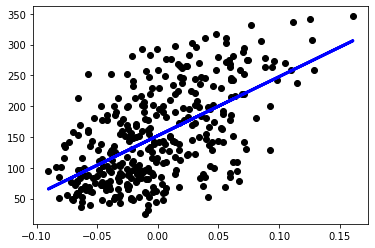

In [7]:
# This part illustrates the regression line and training data points.
# It is not necessary to plot for training set, but just in case! 

import matplotlib.pyplot as plt

plt.scatter(bmi_train, target_train, color="black")
plt.plot(bmi_train, target_pred_train, color="blue", linewidth=3)
plt.show() 

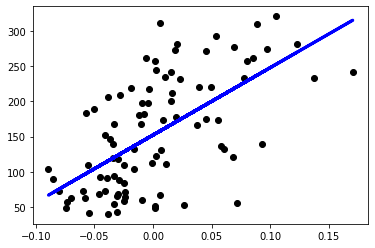

In [8]:
# Plotting the regression line and data points for the test set. 

plt.scatter(bmi_test, target_test, color="black")
plt.plot(bmi_test, target_pred_test, color="blue", linewidth=3)
plt.show() 

## Gradient descent
(fit and predict gradient descent)

In [9]:
from sklearn.linear_model import SGDRegressor

# Creating the SGDRegressor with training dataset. 
sgd = SGDRegressor(max_iter=10000, tol=1e-3, random_state=3143092, penalty='none').fit(bmi_train, target_train)

# Predicting the 
target_SGD_pred_train = sgd.predict(bmi_train)
target_SGD_pred_test = sgd.predict(bmi_test)

In [10]:
# Illustrating the new train and test datasets with their corresponding predicted target values.

train_SGD_result_df = pd.DataFrame(np.array(
    [np.transpose(bmi_train[:,0]), target_train, target_SGD_pred_train]), 
    ["bmi", "sgd_predicte", "target"]).T 

test_SGD_result_df = pd.DataFrame(np.array(
    [np.transpose(bmi_test[:,0]), target_test, target_SGD_pred_test]), 
    ["bmi", "sgd_predicte", "target"]).T 

print(f"\ntrain_SGD_result_df is : \n{train_SGD_result_df}\n\ntest_SGD_result_df is \n{test_SGD_result_df}. ") 


train_SGD_result_df is : 
          bmi  sgd_predicte      target
0    0.061696         151.0  203.301581
1   -0.051474          75.0  109.123034
2    0.044451         141.0  188.950565
3   -0.011595         206.0  142.309760
4   -0.036385         135.0  121.680174
..        ...           ...         ...
348 -0.020218         148.0  135.134252
349 -0.057941          88.0  103.741403
350  0.060618         243.0  202.404643
351 -0.040696          71.0  118.092419
352 -0.071952          77.0   92.081202

[353 rows x 3 columns]

test_SGD_result_df is 
         bmi  sgd_predicte      target
0  -0.055785         109.0  105.535280
1   0.045529         272.0  189.847503
2  -0.009439          60.0  144.103637
3  -0.033151          54.0  124.370989
4   0.049840         221.0  193.435257
..       ...           ...         ...
84  0.019662         178.0  168.320978
85 -0.015906         104.0  138.722006
86 -0.015906         132.0  138.722006
87  0.039062         220.0  184.465872
88 -0.073030    

### mse and rsquared (Training set)

In [11]:
mse_SGD_train = mean_squared_error(target_train, target_SGD_pred_train) 
r2_SGD_train = r2_score(target_train, target_SGD_pred_train) 

print(f"For training dataset: \nmse: {mse_SGD_train}, r2: {r2_SGD_train}") 

For training dataset: 
mse: 3876.6262907067844, r2: 0.33204682920628537


### mse and rsquared (Testing set)

In [12]:
mse_SGD_test = mean_squared_error(target_test, target_SGD_pred_test) 
r2_SGD_test = r2_score(target_test, target_SGD_pred_test) 

print(f"For testing dataset: \nmse: {mse_SGD_test}, r2: {r2_SGD_test}") 

For testing dataset: 
mse: 4099.931748688099, r2: 0.3615573646533099


<b style=color:lightgreen>At first try, I had r2_score of lower than 0.2 and mse greater than 4500 for both the training and testing datasets. </p>
<b style=color:lightgreen>Next time I changed the iteration to 10000, and I got the above results, both r2_scores more than 0.3 and mse for training set lower than 4000 and mse for testing set lower than 4500.

### Plot Regression graph

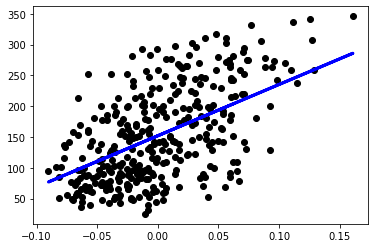

In [13]:
plt.scatter(bmi_train, target_train, color="black")
plt.plot(bmi_train, target_SGD_pred_train, color="blue", linewidth=3)
plt.show() 

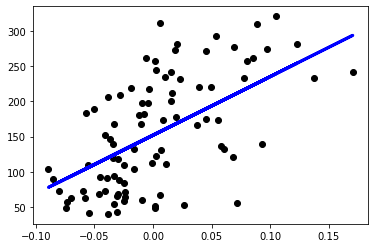

In [14]:
plt.scatter(bmi_test, target_test, color="black")
plt.plot(bmi_test, target_SGD_pred_test, color="blue", linewidth=3)
plt.show() 

# Multivariate Linear Regression
(Grab appropriate features and data split)

In [15]:
# Splitting the data from the start.
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0, shuffle=False)

# Defining the X and Y for training set.
X_train_mvlr = X_train.drop('target', axis=1)
Y_train_mvlr = X_train['target']

# Defining the X and Y for testing set.
X_test_mvlr = X_test.drop('target', axis=1)
Y_test_mvlr = X_test['target']

## No feature scaling

## Fit and predict Normal Equation

In [16]:
# Generatin the model for Multi_Variate Linear Regression (MLVR). 
mlv_reg = LinearRegression().fit(X_train_mvlr, Y_train_mvlr)

# Predicting the target for the train set. 
target_pred_mlvr_train = mlv_reg.predict(X_train_mvlr) 

# Predicting the target for the test set. 
target_pred_mlvr_test = mlv_reg.predict(X_test_mvlr) 

### mse and rsquared (Training set)

In [17]:
mse_train = mean_squared_error(Y_train_mvlr, target_pred_mlvr_train) 
r2_train = r2_score(Y_train_mvlr, target_pred_mlvr_train) 

print(f"For training dataset: \nmse : {mse_train}, r2: {r2_train}")

For training dataset: 
mse : 2850.2607240058587, r2: 0.5088923859510339


### mse and rsquared (Testing set)

In [18]:
mse_test = mean_squared_error(Y_test_mvlr, target_pred_mlvr_test) 
r2_test = r2_score(Y_test_mvlr, target_pred_mlvr_test) 

print(f"For training dataset: \nmse : {mse_test}, r2: {r2_test}")

For training dataset: 
mse : 2929.8952913182065, r2: 0.5437558023550999


## Fit and predict Gradient Descent (without feature scaling)

In [19]:
# Generating the SGDRegressor over the training set (with multivariate features) with respect to the target variable.
sgd_mvlr = SGDRegressor(max_iter=1000000, tol=1e-5, random_state=0).fit(X_train_mvlr, Y_train_mvlr)

# Predicting the target for both train and test sets. 
target_pred_SGD_mlvr_train= sgd_mvlr.predict(X_train_mvlr)
target_pred_SGD_mlvr_test= sgd_mvlr.predict(X_test_mvlr)

### mse and rsquared (Training set) No feature scaling

In [20]:
mse_train = mean_squared_error(Y_train_mvlr, target_pred_SGD_mlvr_train) 
r2_train = r2_score(Y_train_mvlr, target_pred_SGD_mlvr_train) 

print(f"For training dataset: \nmse : {mse_train}, r2: {r2_train}")

For training dataset: 
mse : 2895.2000126126386, r2: 0.5011492252573991


### mse and rsquared (Testing set) No feature scaling

In [21]:
mse_test = mean_squared_error(Y_test_mvlr, target_pred_SGD_mlvr_test) 
r2_test = r2_score(Y_test_mvlr, target_pred_SGD_mlvr_test) 

print(f"For training dataset: \nmse : {mse_test}, r2: {r2_test}")

For training dataset: 
mse : 3043.79945085165, r2: 0.5260186115316793


## Feature scaling
(Feature scale your data here)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_mvlr)
X_train_mvlr_scaled = scaler.transform(X_train_mvlr)
X_test_mvlr_scaled = scaler.transform(X_test_mvlr)

## Fit and predict Gradient Descent (with feature scaling)

In [23]:
# Generating the SGDRegressor over the training set (with multivariate features) with respect to the target variable.
sgd_mvlr = SGDRegressor(max_iter=1000000, tol=1e-5, random_state=0).fit(X_train_mvlr_scaled, Y_train_mvlr)

# Predicting the target for both train and test sets. 
target_pred_SGD_mlvr_scaled_train= sgd_mvlr.predict(X_train_mvlr_scaled)
target_pred_SGD_mlvr_scaled_test= sgd_mvlr.predict(X_test_mvlr_scaled)

### mse and rsquared (Training set) feature scaling

In [24]:
mse_train = mean_squared_error(Y_train_mvlr, target_pred_SGD_mlvr_scaled_train) 
r2_train = r2_score(Y_train_mvlr, target_pred_SGD_mlvr_scaled_train) 

print(f"For training dataset: \nmse : {mse_train}, r2: {r2_train}")

For training dataset: 
mse : 2855.9570177920004, r2: 0.5079108991604844


### mse and rsquared (Testing set) feature scaling 

In [25]:
mse_test = mean_squared_error(Y_test_mvlr, target_pred_SGD_mlvr_scaled_test) 
r2_test = r2_score(Y_test_mvlr, target_pred_SGD_mlvr_scaled_test) 

print(f"For training dataset: \nmse : {mse_test}, r2: {r2_test}") 

For training dataset: 
mse : 2992.146008704137, r2: 0.5340621014604905


# Loading Classification data

In [26]:
from sklearn.datasets import load_iris

iris_df = load_iris(as_frame=True).frame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Binary Logistic Classification

(Grab appropriate features and data split)
## No Feature Scaling

In [27]:
import copy

# Copying the dataframe to avoid messing with the first version. 
iris_df_cp = copy.deepcopy(iris_df)

# Shuffling the dataset.
iris_df_cp = iris_df.sample(frac=1., random_state=0).reset_index(drop=True)

# Setting the target values that are equal to 2, to 0.
iris_df_cp[iris_df_cp["target"]==2] = 0

# Select the desired columns. 
X = iris_df_cp[["sepal length (cm)", "sepal width (cm)"]]
Y = iris_df_cp["target"]

# Splitting the dataset into train and test sets.
X_train_iris, X_test_iris, Y_train_iris, Y_test_iris = train_test_split(X, Y, test_size=0.2)


In [28]:
from sklearn.linear_model import LogisticRegression 

log = LogisticRegression().fit(X_train_iris, Y_train_iris) 
Y_p_train = log.predict(X_train_iris)
Y_p_test = log.predict(X_test_iris) 

df_train = pd.DataFrame(np.array(
        np.transpose(
            [X_train_iris.iloc[:,0], X_train_iris.iloc[:,1], Y_train_iris, Y_p_train]
            )
        ),
    columns=["sepal length", "sepal width", "target", "predicted"])

df_test = pd.DataFrame(np.array(
        np.transpose(
            [X_test_iris.iloc[:,0], X_test_iris.iloc[:,1], Y_test_iris, Y_p_test]
            )
        ),
    columns=["sepal length", "sepal width", "target", "predicted"])

print(df_train,'\n\n', df_test)

     sepal length  sepal width  target  predicted
0             0.0          0.0     0.0        0.0
1             0.0          0.0     0.0        0.0
2             0.0          0.0     0.0        0.0
3             4.3          3.0     0.0        0.0
4             0.0          0.0     0.0        0.0
..            ...          ...     ...        ...
115           5.7          4.4     0.0        0.0
116           4.9          3.0     0.0        0.0
117           4.9          3.1     0.0        0.0
118           0.0          0.0     0.0        0.0
119           6.0          2.9     1.0        1.0

[120 rows x 4 columns] 

     sepal length  sepal width  target  predicted
0            0.0          0.0     0.0        0.0
1            5.7          2.8     1.0        1.0
2            4.4          2.9     0.0        0.0
3            6.5          2.8     1.0        1.0
4            5.0          3.5     0.0        0.0
5            5.0          3.0     0.0        0.0
6            6.1          2.8 

In [29]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score 

accuracy = accuracy_score(Y_test_iris, Y_p_test, normalize=True)
f1_scoer = f1_score(Y_test_iris, Y_p_test)
auc = roc_auc_score(Y_test_iris, log.decision_function(X_test_iris))

print(f"accuracy: {accuracy}, f1_score: {f1_scoer}, auc: {auc}")

accuracy: 1.0, f1_score: 1.0, auc: 1.0


## Fit and predict Gradient Descent (without feature scaling)

In [30]:
from sklearn.linear_model import SGDClassifier 
sgd = SGDClassifier(max_iter=10000, tol=1e-3, loss='log_loss', random_state=0, penalty='none').fit(X_train_iris, Y_train_iris)
Y_p_train = sgd.predict(X_train_iris)
Y_p_test = sgd.predict(X_test_iris) 

In [31]:
# Define new dataframe for train set with predicted target with SGD.
sgd_df_train = pd.DataFrame(np.array(
        np.transpose(
            [X_train_iris.iloc[:,0], 
             X_train_iris.iloc[:,1], 
             Y_train_iris, Y_p_train]
            )
        ),
    columns=["sepal length", "sepal width", "target", "predicted"])

# Define new dataframe for test set with predicted target with SGD.
sgd_df_test = pd.DataFrame(np.array(
        np.transpose(
            [X_test_iris.iloc[:,0], 
             X_test_iris.iloc[:,1], 
             Y_test_iris, Y_p_test]
            )
        ),
    columns=["sepal length", "sepal width", "target", "predicted"])

print(sgd_df_train,'\n\n', sgd_df_test)

     sepal length  sepal width  target  predicted
0             0.0          0.0     0.0        0.0
1             0.0          0.0     0.0        0.0
2             0.0          0.0     0.0        0.0
3             4.3          3.0     0.0        0.0
4             0.0          0.0     0.0        0.0
..            ...          ...     ...        ...
115           5.7          4.4     0.0        0.0
116           4.9          3.0     0.0        0.0
117           4.9          3.1     0.0        0.0
118           0.0          0.0     0.0        0.0
119           6.0          2.9     1.0        1.0

[120 rows x 4 columns] 

     sepal length  sepal width  target  predicted
0            0.0          0.0     0.0        0.0
1            5.7          2.8     1.0        1.0
2            4.4          2.9     0.0        0.0
3            6.5          2.8     1.0        1.0
4            5.0          3.5     0.0        0.0
5            5.0          3.0     0.0        0.0
6            6.1          2.8 

### accuracy, f1-score and AUC (Training set) no feature scaling

In [32]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_train_iris, Y_p_train, normalize=True) 
f1_score = f1_score(Y_train_iris, Y_p_train) 
auc = roc_auc_score(Y_train_iris, sgd.decision_function(X_train_iris)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 0.9833333333333333, f1_score: 0.975, auc: 0.9984375000000001


### accuracy, f1-score and AUC (Testing set) no feature scaling

In [36]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_test_iris, Y_p_test, normalize=True) 
f1_score = f1_score(Y_test_iris, Y_p_test)
auc = roc_auc_score(Y_test_iris, sgd.decision_function(X_test_iris)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: 1.0, auc: 1.0


### plot decision boundary on testing set no feature scaling

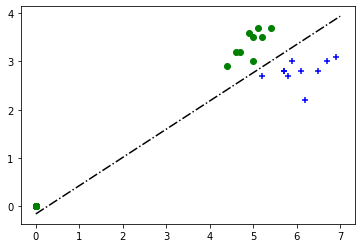

In [37]:
fig = plt.figure()


# Deviding the data in two categories with respect to the target values. 
positive_samples = sgd_df_test[sgd_df_test["target"]==1]
negative_samples = sgd_df_test[sgd_df_test["target"]==0]

# Plot your positive examples
plt.scatter(positive_samples["sepal length"],positive_samples["sepal width"], marker='+', c ='blue')

# Plot your negative examples
plt.scatter(negative_samples["sepal length"],negative_samples["sepal width"], marker='o', c= 'green')

w = sgd.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0,7)
yy = a * xx - (sgd.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-.')
plt.show()

### plot confusion matrix on testing set no feature scaling

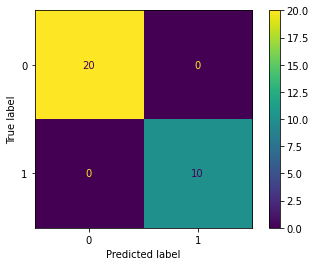

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test_iris, Y_p_test, labels=sgd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd.classes_)
disp.plot() 
plt.show() 

## Fit and predict using lbfgs optimizer (without feature scaling)

In [40]:
reg = LogisticRegression(random_state=0, solver='lbfgs', penalty='none')
reg.fit(X_train_iris, Y_train_iris)

Y_p_train = reg.predict(X_train_iris)
Y_p_test = reg.predict(X_test_iris)

# Define new dataframe for train set with predicted target with lbfgs logistic regression.
train_lbfgs_df = pd.DataFrame(
    np.array(
        np.transpose(
            [X_train_iris.iloc[:,0], 
             X_train_iris.iloc[:,1],
             Y_train_iris, Y_p_train]
        )
    ),
    columns=["sepal length", "sepal width", "target", "predicted"]

)

# Define new dataframe for test set with predicted target with lbfgs logistic regression.
test_lbfgs_df = pd.DataFrame(
    np.array(
        np.transpose(
            [X_test_iris.iloc[:,0], 
             X_test_iris.iloc[:,1],
             Y_test_iris, Y_p_test]
        )
    ),
    columns=["sepal length", "sepal width", "target", "predicted"]
)

print(train_lbfgs_df,'\n\n', test_lbfgs_df)

     sepal length  sepal width  target  predicted
0             0.0          0.0     0.0        0.0
1             0.0          0.0     0.0        0.0
2             0.0          0.0     0.0        0.0
3             4.3          3.0     0.0        0.0
4             0.0          0.0     0.0        0.0
..            ...          ...     ...        ...
115           5.7          4.4     0.0        0.0
116           4.9          3.0     0.0        0.0
117           4.9          3.1     0.0        0.0
118           0.0          0.0     0.0        0.0
119           6.0          2.9     1.0        1.0

[120 rows x 4 columns] 

     sepal length  sepal width  target  predicted
0            0.0          0.0     0.0        0.0
1            5.7          2.8     1.0        1.0
2            4.4          2.9     0.0        0.0
3            6.5          2.8     1.0        1.0
4            5.0          3.5     0.0        0.0
5            5.0          3.0     0.0        0.0
6            6.1          2.8 

### accuracy, f1-score and AUC (Training set) no feature scaling

In [41]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_train_iris, Y_p_train, normalize=True) 
f1_score = f1_score(Y_train_iris, Y_p_train) 
auc = roc_auc_score(Y_train_iris, reg.decision_function(X_train_iris)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: 1.0, auc: 1.0


### accuracy, f1-score and AUC (Testing set) no feature scaling

In [43]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_test_iris, Y_p_test, normalize=True) 
f1_score = f1_score(Y_test_iris, Y_p_test) 
auc = roc_auc_score(Y_test_iris, reg.decision_function(X_test_iris)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: 1.0, auc: 1.0


### plot decision boundary on testing set no feature scaling

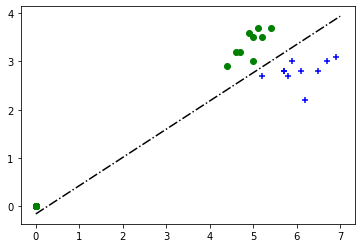

In [44]:
fig = plt.figure()


# Deviding the data in two categories with respect to the target values. 
positive_samples = test_lbfgs_df[test_lbfgs_df["target"]==1]
negative_samples = test_lbfgs_df[test_lbfgs_df["target"]==0]

# Plot your positive examples
plt.scatter(positive_samples["sepal length"],positive_samples["sepal width"], marker='+', c ='blue')

# Plot your negative examples
plt.scatter(negative_samples["sepal length"],negative_samples["sepal width"], marker='o', c= 'green')

w = sgd.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0,7)
yy = a * xx - (sgd.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-.')
plt.show()

### plot confusion matrix on testing set no feature scaling

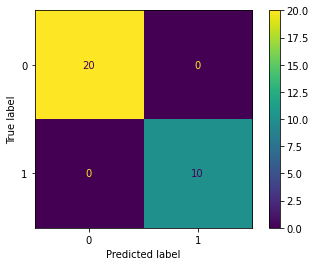

In [45]:
cm = confusion_matrix(Y_test_iris, Y_p_test, labels=reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=reg.classes_)
disp.plot() 
plt.show() 

## Feature scaling

(feature scale your data here)

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_iris)

X_train_scaled = scaler.transform(X_train_iris)
X_test_scaled = scaler.transform(X_test_iris)

## Fit and predict Gradient Descent (with feature scaling)

In [48]:
sgd_scaled = SGDClassifier(max_iter=12000,  tol=1e-3, loss='log_loss', random_state=0, penalty='none').fit(X_train_scaled, Y_train_iris)
Y_p_train_scaled = sgd.predict(X_train_scaled)
Y_p_test_scaled = sgd.predict(X_test_scaled)

c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [49]:
# Define new dataframe for train set with predicted target with SGD.
sgd_df_train_scaled = pd.DataFrame(np.array(
        np.transpose(
            [X_train_scaled[:,0], 
            X_train_scaled[:,1],
            Y_train_iris, Y_p_train_scaled]
            ) 
        ),
    columns=["sepal length", "sepal width", "target", "predicted"])

# Define new dataframe for train set with predicted target with SGD.
sgd_df_test_scaled = pd.DataFrame(np.array(
        np.transpose(
            [X_test_scaled[:,0], 
            X_test_scaled[:,1], 
            Y_test_iris, Y_p_test_scaled]
            )
        ),
    columns=["sepal length", "sepal width", "target", "predicted"])

print(sgd_df_train_scaled,'\n\n', sgd_df_test_scaled)

     sepal length  sepal width  target  predicted
0        0.000000     0.000000     0.0        0.0
1        0.000000     0.000000     0.0        0.0
2        0.000000     0.000000     0.0        0.0
3        0.614286     0.681818     0.0        0.0
4        0.000000     0.000000     0.0        0.0
..            ...          ...     ...        ...
115      0.814286     1.000000     0.0        0.0
116      0.700000     0.681818     0.0        0.0
117      0.700000     0.704545     0.0        0.0
118      0.000000     0.000000     0.0        0.0
119      0.857143     0.659091     1.0        0.0

[120 rows x 4 columns] 

     sepal length  sepal width  target  predicted
0       0.000000     0.000000     0.0        0.0
1       0.814286     0.636364     1.0        0.0
2       0.628571     0.659091     0.0        0.0
3       0.928571     0.636364     1.0        0.0
4       0.714286     0.795455     0.0        0.0
5       0.714286     0.681818     0.0        0.0
6       0.871429     0.636364 

### accuracy, f1-score and AUC (Training set) with feature scaling

In [50]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_train_iris, Y_p_train_scaled, normalize=True) 
f1_score = f1_score(Y_train_iris, Y_p_train) 
auc = roc_auc_score(Y_train_iris, sgd_scaled.decision_function(X_train_scaled)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 0.6666666666666666, f1_score: 1.0, auc: 1.0


### accuracy, f1-score and AUC (Testing set) with feature scaling

In [51]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_test_iris, Y_p_test_scaled, normalize=True) 
f1_score = f1_score(Y_test_iris, Y_p_test) 
auc = roc_auc_score(Y_test_iris, sgd_scaled.decision_function(X_test_scaled)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 0.6666666666666666, f1_score: 1.0, auc: 1.0


### plot decision boundary on testing set with feature scaling

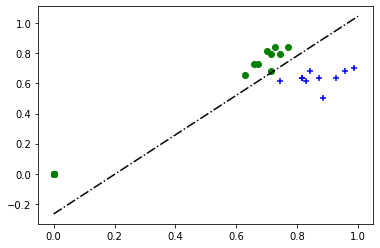

In [53]:
fig = plt.figure()


# Deviding the data in two categories with respect to the target values. 
positive_samples = sgd_df_test_scaled[sgd_df_test_scaled["target"]==1]
negative_samples = sgd_df_test_scaled[sgd_df_test_scaled["target"]==0]

# Plot your positive examples
plt.scatter(positive_samples["sepal length"],positive_samples["sepal width"], marker='+', c ='blue')

# Plot your negative examples
plt.scatter(negative_samples["sepal length"],negative_samples["sepal width"], marker='o', c= 'green')

w = sgd_scaled.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0,1)
yy = a * xx - (sgd_scaled.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-.')
plt.show()

### plot confusion matrix on testing set with feature scaling

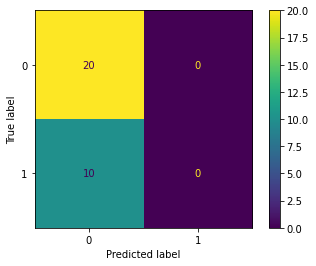

In [54]:
cm = confusion_matrix(Y_test_iris, Y_p_test_scaled, labels=sgd_scaled.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_scaled.classes_)
disp.plot() 
plt.show() 

## Fit and predict using lbfgs optimizer (with feature scaling)

In [59]:
reg_scaled = LogisticRegression(random_state=10, solver='lbfgs', penalty='none')
reg_scaled.fit(X_train_scaled, Y_train_iris)

Y_p_train = reg_scaled.predict(X_train_scaled)
Y_p_test = reg_scaled.predict(X_test_scaled)

# Define new dataframe for train set with predicted target with lbfgs logistic regression.
train_lbfgs_df = pd.DataFrame(
    np.array(
        np.transpose(
            [X_train_iris.iloc[:,0], 
             X_train_iris.iloc[:,1],
             Y_train_iris, Y_p_train]
        )
    ),
    columns=["sepal length", "sepal width", "target", "predicted"]

)

# Define new dataframe for test set with predicted target with lbfgs logistic regression.
test_lbfgs_df = pd.DataFrame(
    np.array(
        np.transpose(
            [X_test_iris.iloc[:,0], 
             X_test_iris.iloc[:,1],
             Y_test_iris, Y_p_test]
        )
    ),
    columns=["sepal length", "sepal width", "target", "predicted"]
)

print(train_lbfgs_df,'\n\n', test_lbfgs_df)

     sepal length  sepal width  target  predicted
0             0.0          0.0     0.0        0.0
1             0.0          0.0     0.0        0.0
2             0.0          0.0     0.0        0.0
3             4.3          3.0     0.0        0.0
4             0.0          0.0     0.0        0.0
..            ...          ...     ...        ...
115           5.7          4.4     0.0        0.0
116           4.9          3.0     0.0        0.0
117           4.9          3.1     0.0        0.0
118           0.0          0.0     0.0        0.0
119           6.0          2.9     1.0        1.0

[120 rows x 4 columns] 

     sepal length  sepal width  target  predicted
0            0.0          0.0     0.0        0.0
1            5.7          2.8     1.0        1.0
2            4.4          2.9     0.0        0.0
3            6.5          2.8     1.0        1.0
4            5.0          3.5     0.0        0.0
5            5.0          3.0     0.0        0.0
6            6.1          2.8 

### accuracy, f1-score and AUC (Training set) with feature scaling

In [60]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_train_iris, Y_p_train, normalize=True) 
f1_score = f1_score(Y_train_iris, Y_p_train) 
auc = roc_auc_score(Y_train_iris, reg_scaled.decision_function(X_train_scaled)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: 1.0, auc: 1.0


### accuracy, f1-score and AUC (Testing set) with feature scaling

In [61]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_test_iris, Y_p_test, normalize=True) 
f1_score = f1_score(Y_test_iris, Y_p_test) 
auc = roc_auc_score(Y_test_iris, reg_scaled.decision_function(X_test_scaled)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: 1.0, auc: 1.0


### plot decision boundary on testing set with feature scaling

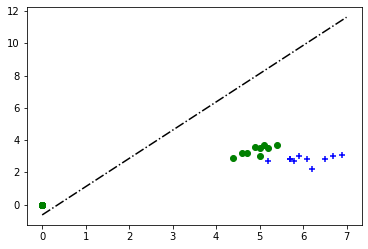

In [62]:
fig = plt.figure()


# Deviding the data in two categories with respect to the target values. 
positive_samples = test_lbfgs_df[test_lbfgs_df["target"]==1]
negative_samples = test_lbfgs_df[test_lbfgs_df["target"]==0]

# Plot your positive examples
plt.scatter(positive_samples["sepal length"],positive_samples["sepal width"], marker='+', c ='blue')

# Plot your negative examples
plt.scatter(negative_samples["sepal length"],negative_samples["sepal width"], marker='o', c= 'green')

w = reg_scaled.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0,7)
yy = a * xx - (reg_scaled.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-.')
plt.show()

### plot confusion matrix on testing set with feature scaling

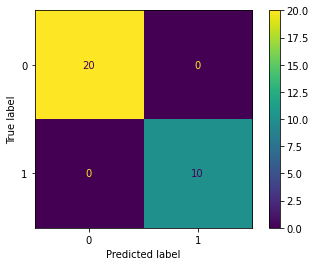

In [63]:
cm = confusion_matrix(Y_test_iris, Y_p_test, labels=reg_scaled.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=reg_scaled.classes_)
disp.plot() 
plt.show() 

# Multinomial Logistic Regression

(Grab appropriate features and data split)
## No Feature Scaling

In [64]:
# Select the desired columns. 
X = iris_df_cp[["sepal length (cm)", "sepal width (cm)",
                "petal length (cm)", "petal width (cm)"]]
Y = iris_df_cp["target"]

# Splitting the dataset into train and test sets.
X_train_iris, X_test_iris, Y_train_iris, Y_test_iris = train_test_split(X, Y, test_size=0.2)

## Fit and predict Gradient Descent (without feature scaling)

In [65]:
sgd = SGDClassifier(max_iter=10000, tol=1e-3, loss='log_loss', random_state=0, penalty='none').fit(X_train_iris, Y_train_iris)
Y_p_train = sgd.predict(X_train_iris)
Y_p_test = sgd.predict(X_test_iris) 

# Define new dataframe for train set with predicted target with SGD.
sgd_df_train = pd.DataFrame(np.array(
        np.transpose(
            [X_train_iris.iloc[:,0],
             X_train_iris.iloc[:,1],
             X_train_iris.iloc[:,2],
             X_train_iris.iloc[:,3],
              Y_train_iris, Y_p_train]
            )
        ),
    columns=["sepal length", "sepal width", "petal length", "petal width", "target", "predicted"])

# Define new dataframe for test set with predicted target with SGD.
sgd_df_test = pd.DataFrame(np.array(
        np.transpose(
            [X_test_iris.iloc[:,0],
             X_test_iris.iloc[:,1],
             X_test_iris.iloc[:,2],
             X_test_iris.iloc[:,3],
             Y_test_iris, Y_p_test]
            )
        ),
    columns=["sepal length", "sepal width", "petal length", "petal width", "target", "predicted"])

print(sgd_df_train,'\n\n', sgd_df_test)

     sepal length  sepal width  petal length  petal width  target  predicted
0             5.0          3.2           1.2          0.2     0.0        0.0
1             6.9          3.1           4.9          1.5     1.0        1.0
2             5.0          3.5           1.6          0.6     0.0        0.0
3             4.4          2.9           1.4          0.2     0.0        0.0
4             0.0          0.0           0.0          0.0     0.0        0.0
..            ...          ...           ...          ...     ...        ...
115           4.8          3.0           1.4          0.1     0.0        0.0
116           5.9          3.0           4.2          1.5     1.0        1.0
117           5.0          3.6           1.4          0.2     0.0        0.0
118           0.0          0.0           0.0          0.0     0.0        0.0
119           0.0          0.0           0.0          0.0     0.0        0.0

[120 rows x 6 columns] 

     sepal length  sepal width  petal length  peta

### accuracy(Training set) No feature scaling

In [66]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_train_iris, Y_p_train, normalize=True) 
f1_score = f1_score(Y_train_iris, Y_p_train) 
auc = roc_auc_score(Y_train_iris, sgd.decision_function(X_train_iris)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: 1.0, auc: 1.0


### accuracy(Testing set) No feature scaling

In [67]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_test_iris, Y_p_test, normalize=True) 
f1_score = f1_score(Y_test_iris, Y_p_test) 
auc = roc_auc_score(Y_test_iris, sgd.decision_function(X_test_iris)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: 1.0, auc: 1.0


## Fit and predict using lbfgs optimizer (without feature scaling)

In [68]:
reg = LogisticRegression(random_state=0, solver='lbfgs', penalty='none')
reg.fit(X_train_iris, Y_train_iris)

Y_p_train = reg.predict(X_train_iris)
Y_p_test = reg.predict(X_test_iris)

# Define new dataframe for train set with predicted target with lbfgs logistic regression.
train_lbfgs_df = pd.DataFrame(
    np.array(
        np.transpose(
            [X_train_iris.iloc[:,0], 
             X_train_iris.iloc[:,1],
             X_train_iris.iloc[:,2],
             X_train_iris.iloc[:,3],
             Y_train_iris, Y_p_train]
        )
    ),
    columns=["sepal length", "sepal width", "petal length", "petal width", "target", "predicted"]

)

# Define new dataframe for test set with predicted target with lbfgs logistic regression.
test_lbfgs_df = pd.DataFrame(
    np.array(
        np.transpose(
            [X_test_iris.iloc[:,0], 
             X_test_iris.iloc[:,1],
             X_test_iris.iloc[:,2],
             X_test_iris.iloc[:,3],
             Y_test_iris, Y_p_test]
        )
    ),
    columns=["sepal length", "sepal width", "petal length", "petal width", "target", "predicted"]
)

print(train_lbfgs_df,'\n\n', test_lbfgs_df)

     sepal length  sepal width  petal length  petal width  target  predicted
0             5.0          3.2           1.2          0.2     0.0        0.0
1             6.9          3.1           4.9          1.5     1.0        1.0
2             5.0          3.5           1.6          0.6     0.0        0.0
3             4.4          2.9           1.4          0.2     0.0        0.0
4             0.0          0.0           0.0          0.0     0.0        0.0
..            ...          ...           ...          ...     ...        ...
115           4.8          3.0           1.4          0.1     0.0        0.0
116           5.9          3.0           4.2          1.5     1.0        1.0
117           5.0          3.6           1.4          0.2     0.0        0.0
118           0.0          0.0           0.0          0.0     0.0        0.0
119           0.0          0.0           0.0          0.0     0.0        0.0

[120 rows x 6 columns] 

     sepal length  sepal width  petal length  peta

### accuracy(Training set) No feature scaling

In [69]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_train_iris, Y_p_train, normalize=True) 
f1_score = f1_score(Y_train_iris, Y_p_train) 
auc = roc_auc_score(Y_train_iris, reg.decision_function(X_train_iris)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: 1.0, auc: 1.0


### accuracy(Testing set) No feature scaling

In [70]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_test_iris, Y_p_test, normalize=True) 
f1_score = f1_score(Y_test_iris, Y_p_test) 
auc = roc_auc_score(Y_test_iris, reg.decision_function(X_test_iris)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: 1.0, auc: 1.0


## Feature scaling

(feature scale your data here)

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_iris)

X_train_scaled = scaler.transform(X_train_iris)
X_test_scaled = scaler.transform(X_test_iris)

## Fit and predict Gradient Descent (with feature scaling)

In [72]:
sgd_scaled = SGDClassifier(max_iter=12000,  tol=1e-3, loss='log_loss', random_state=0, penalty='none').fit(X_train_scaled, Y_train_iris)
Y_p_train_scaled = sgd.predict(X_train_scaled)
Y_p_test_scaled = sgd.predict(X_test_scaled) 

c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


### accuracy (Training set) with feature scaling

In [73]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_train_iris, Y_p_train_scaled, normalize=True) 
f1_score = f1_score(Y_train_iris, Y_p_train) 
auc = roc_auc_score(Y_train_iris, sgd_scaled.decision_function(X_train_scaled)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: 1.0, auc: 1.0


### accuracy (Testing set) with feature scaling

In [74]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_test_iris, Y_p_test, normalize=True) 
f1_score = f1_score(Y_test_iris, Y_p_test) 
auc = roc_auc_score(Y_test_iris, sgd_scaled.decision_function(X_test_scaled)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: 1.0, auc: 1.0


## Fit and predict lbfgs optimizer (with feature scaling)

In [75]:
reg_scaled = LogisticRegression(random_state=0, solver='lbfgs', penalty='none')
reg_scaled.fit(X_train_scaled, Y_train_iris)

Y_p_train = reg_scaled.predict(X_train_scaled)
Y_p_test = reg_scaled.predict(X_test_scaled)

# Define new dataframe for train set with predicted target with lbfgs logistic regression.
train_lbfgs_df = pd.DataFrame(
    np.array(
        np.transpose(
            [X_train_iris.iloc[:,0], 
             X_train_iris.iloc[:,1],
             X_train_iris.iloc[:,2],
             X_train_iris.iloc[:,3],
             Y_train_iris, Y_p_train]
        )
    ),
    columns=["sepal length", "sepal width", "petal length", "petal length", "target", "predicted"]

)

# Define new dataframe for test set with predicted target with lbfgs logistic regression.
test_lbfgs_df = pd.DataFrame(
    np.array(
        np.transpose(
            [X_test_iris.iloc[:,0], 
             X_test_iris.iloc[:,1],
             X_test_iris.iloc[:,2],
             X_test_iris.iloc[:,3],
             Y_test_iris, Y_p_test]
        )
    ),
    columns=["sepal length", "sepal width", "petal length", "petal length", "target", "predicted"]
)

print(train_lbfgs_df,'\n\n', test_lbfgs_df)

     sepal length  sepal width  petal length  petal length  target  predicted
0             5.0          3.2           1.2           0.2     0.0        0.0
1             6.9          3.1           4.9           1.5     1.0        1.0
2             5.0          3.5           1.6           0.6     0.0        0.0
3             4.4          2.9           1.4           0.2     0.0        0.0
4             0.0          0.0           0.0           0.0     0.0        0.0
..            ...          ...           ...           ...     ...        ...
115           4.8          3.0           1.4           0.1     0.0        0.0
116           5.9          3.0           4.2           1.5     1.0        1.0
117           5.0          3.6           1.4           0.2     0.0        0.0
118           0.0          0.0           0.0           0.0     0.0        0.0
119           0.0          0.0           0.0           0.0     0.0        0.0

[120 rows x 6 columns] 

     sepal length  sepal width  petal 

### accuracy(Training set) with feature scaling

In [76]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_train_iris, Y_p_train, normalize=True) 
f1_score = f1_score(Y_train_iris, Y_p_train) 
auc = roc_auc_score(Y_train_iris, reg_scaled.decision_function(X_train_scaled)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: 1.0, auc: 1.0


### accuracy(Testing set) with feature scaling

In [77]:
from sklearn.metrics import f1_score

accuracy = accuracy_score(Y_test_iris, Y_p_test, normalize=True) 
# f1_score = f1_este(Y_test_iris, Y_p_test) 
auc = roc_auc_score(Y_test_iris, reg_scaled.decision_function(X_test_scaled)) 
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}") 

accuracy: 1.0, f1_score: <function f1_score at 0x0000019CFFAEB0A0>, auc: 1.0
